In [1]:
# %load_ext autoreload
# %autoreload 2
import uproot
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import root_aux as raux

In [141]:
simfile = "./simline320_270_76fib_8lay_n1e7_nowallpetCUT93_mask467_210mm_20thick_0_0_30_3.root"
simdata, source = raux.get_histo(simfile, ["energyDeposits", "sourceHist"])
source_row = source.vals.reshape(-1)
sim_vals_row = simdata.vals.reshape(-1)

In [7]:
matrixH =  raux.get_hmat("./matr320_270_76fib_n1e6_nowallpetCUT93_mask467_210mm_20thick_s105_100.root", norm=False)
matrixH2 =  raux.get_hmat("./matr320_270_76fib_n0p5e6_nowallpetCUT93_mask467_210mm_20thick_s105_100.root", norm=False)
matrixH = matrixH + matrixH2
matrixH = matrixH/matrixH.sum(axis=0)

In [158]:
image = raux.reco(matrixH, sim_vals_row, 500, reco=image)

Reconstruction: 100%|██████████| 500/500 [00:34<00:00, 14.33it/s]


In [176]:
reco_row = image[400]
reco = reco_row.reshape(100,100)[:,::-1]/reco_row.max()

In [39]:
# x = np.linspace(0,105,100)-105/2

In [15]:
reco_row2 = image2[-1]
reco2 = reco_row2.reshape(100,100)[:,::-1]

In [43]:
binWidth = 0.5*(source.edges[1]-source.edges[0])

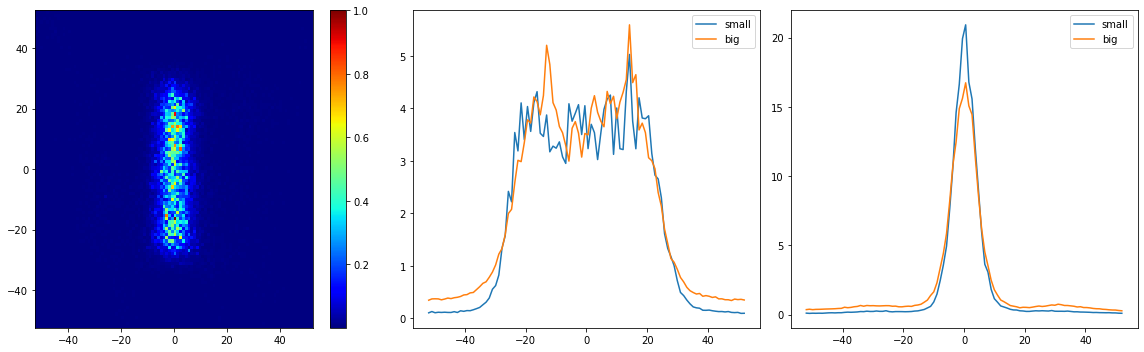

In [160]:
plt.figure(figsize=(16,5))
plt.subplot(131)
plt.pcolor(source.edges, source.edges, reco, cmap="jet")
plt.colorbar()
plt.subplot(132)
plt.plot(source.edges[:-1] + binWidth, reco.sum(axis=1), label="small")
plt.plot(source.edges[:-1] + binWidth, reco2.sum(axis=1), label="big")
plt.legend()
plt.subplot(133)
plt.plot(source.edges[:-1] + binWidth, reco.sum(axis=0), label="small")
plt.plot(source.edges[:-1] + binWidth, reco2.sum(axis=0), label="big")
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
from scipy.optimize import curve_fit
from scipy.stats import norm

In [71]:
def Gauss(x, A, loc, scale):
    y = A * norm.pdf(x, loc=loc, scale=scale)
    return y

In [86]:
parameters, covariance = curve_fit(Gauss, source.edges[:-1] + binWidth, reco2.sum(axis=0)/reco2.sum())

In [87]:
parameters

array([0.82773446, 0.16269994, 4.38757982])

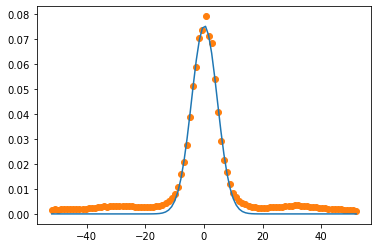

In [88]:
plt.plot(source.edges[:-1] + binWidth, Gauss(source.edges[:-1] + binWidth, *parameters))
plt.scatter(source.edges[:-1] + binWidth, reco2.sum(axis=0)/reco2.sum(), color="tab:orange")
plt.show()

In [46]:
source_row_norm = raux.normalize(source_row)

In [49]:
raux.mse_uqi(image[-1], source_row_norm, normx=True, normy=False)

(0.1328778910795997, 0.4311849500362268)

In [22]:
raux.uqi(raux.normalize(image[-1]), raux.normalize(source_row))

0.23340943907026512

In [15]:
import scipy as sp
import scipy.ndimage

In [208]:
reco2 = sp.ndimage.filters.gaussian_filter(reco, [0.9, 0.9], mode='constant')

In [199]:
# source_row += 1
source_row = a.flatten()

In [301]:
a = np.zeros((100,100))

In [84]:
np.sqrt(((source_vals/source_vals.sum()-reco/reco.sum())**2).sum())

0.04487400466080674

In [178]:
mse, Q = uqi(image[1:], source_row)

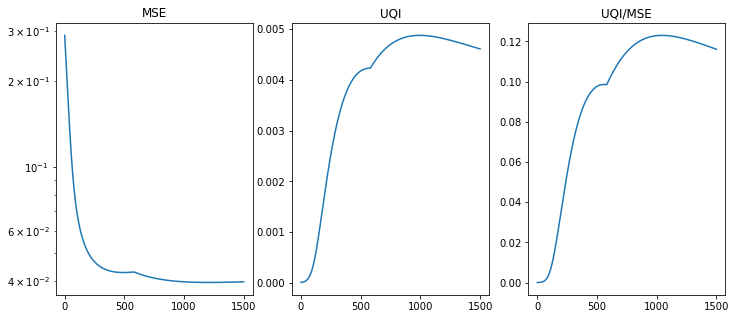

In [184]:
plt.figure(figsize=(12,5))
plt.subplot(131)
plt.plot(mse)
plt.yscale("log")
plt.title("MSE")
plt.subplot(132)
plt.plot(Q)
plt.title("UQI")
plt.subplot(133)
plt.plot(Q/mse)
plt.title("UQI/MSE")
plt.show()

In [180]:
print(np.argmin(mse), np.argmax(Q), np.argmax(Q/mse), int(np.mean([np.argmin(mse), np.argmax(Q), np.argmax(Q/mse)])))

1206 994 1045 1081


In [95]:
reco_row.var()

6437.025303326431

In [101]:
cov

array([[6.43766907e+03, 1.33384538e+06],
       [1.33384538e+06, 5.43156134e+08]])

In [100]:
cov = np.cov(reco_row, source_row)

In [103]:
Q = 4*reco_row.mean()*source_row.mean()*np.sqrt(cov[0,1])/(cov[0,0]+cov[1,1])/(reco_row.mean()**2 + source_row.mean()**2)
Q

4.795304876321361e-08

In [90]:
import pickle

In [91]:
with open("histo.pkl", "rb") as f:
    simdata1e8 = pickle.load(f)

In [94]:
image_n = raux.reco(matrixH, simdata1e8[0].vals.reshape(-1), 500)

Reconstruction: 100%|██████████| 500/500 [00:42<00:00, 11.87it/s]


In [136]:
reco_rown = image_n[-1]
recon = reco_rown.reshape(100,100)[:,::-1]/reco_rown.max()

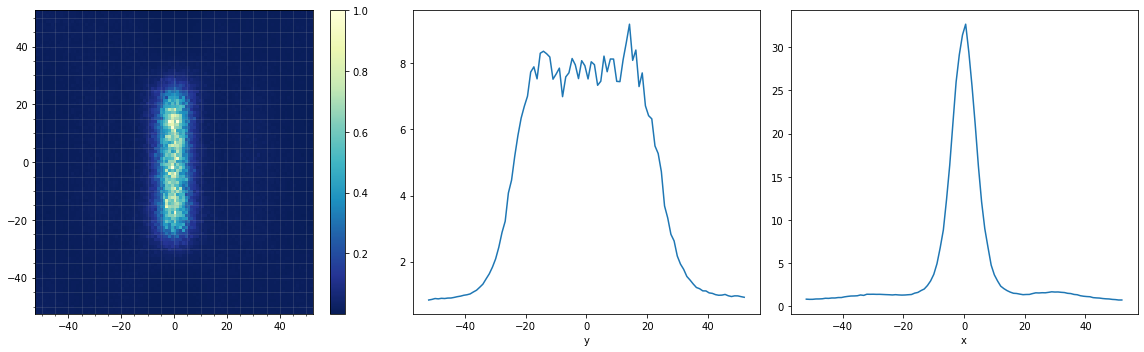

In [140]:
plt.figure(figsize=(16,5))
plt.subplot(131)
plt.pcolor(source.edges, source.edges, recon, cmap="YlGnBu_r", rasterized=True)
plt.minorticks_on()
plt.grid(which="both", alpha=0.2)
# plt.imshow(recon, cmap="jet")
plt.colorbar()
plt.subplot(132)
plt.plot(source.edges[:-1] + binWidth, recon.sum(axis=1), label="small")
plt.xlabel("y")
# plt.legend()
plt.subplot(133)
plt.plot(source.edges[:-1] + binWidth, recon.sum(axis=0), label="small")
plt.xlabel("x")
# plt.legend()
plt.tight_layout()
plt.savefig("histo_n1e8_500iter.pdf", facecolor="white")
plt.show()

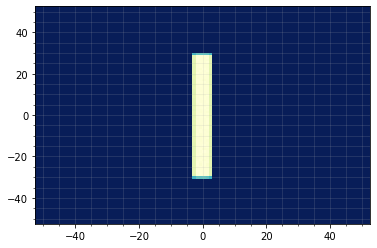

In [129]:
plt.pcolor(source.edges, source.edges, source.vals, cmap="YlGnBu_r", rasterized=True)
plt.minorticks_on()
plt.grid(which="both", alpha=0.2)
plt.savefig("linesource.pdf", facecolor="white")
plt.show()

In [134]:
reco2 = reco2/reco2.max()

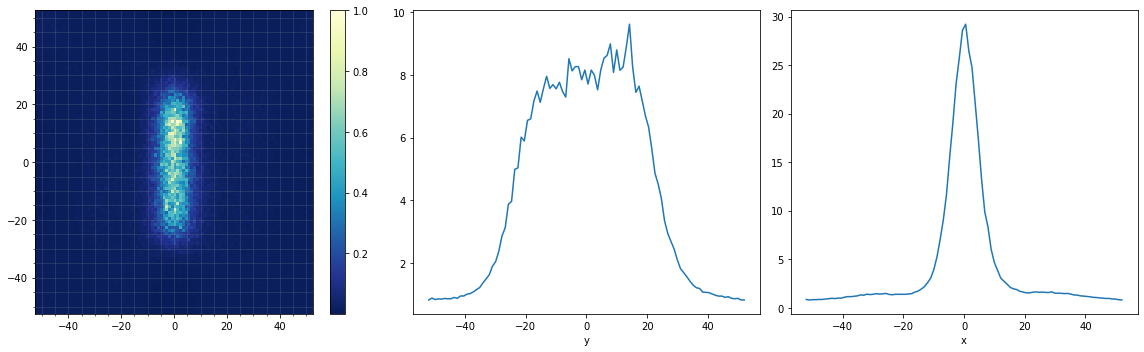

In [177]:
plt.figure(figsize=(16,5))
plt.subplot(131)
plt.pcolor(source.edges, source.edges, reco, cmap="YlGnBu_r", rasterized=True)
plt.minorticks_on()
plt.grid(which="both", alpha=0.2)
# plt.imshow(reco, cmap="jet")
plt.colorbar()
plt.subplot(132)
plt.plot(source.edges[:-1] + binWidth, reco.sum(axis=1), label="small")
plt.xlabel("y")
plt.subplot(133)
plt.plot(source.edges[:-1] + binWidth, reco.sum(axis=0), label="small")
plt.xlabel("x")
# plt.plot(source.edges[:-1] + binWidth, reco2.sum(axis=0), label="big")
# plt.legend()
plt.tight_layout()
plt.savefig("histo_1e7_500iter_8lay.pdf", facecolor="white")
plt.show()

In [173]:
mse_arr = []
uqi_arr = []
b_arr = []
for i in range(1,1000):
    mse, uqi, b = raux.mse_uqi(image[i].reshape(100,100), source.vals)
    mse_arr.append(mse)
    uqi_arr.append(1/uqi)
    b_arr.append(b)
print(mse, 1/uqi, b)

0.12566591115972764 0.5082412639028085 0.24725641163949028


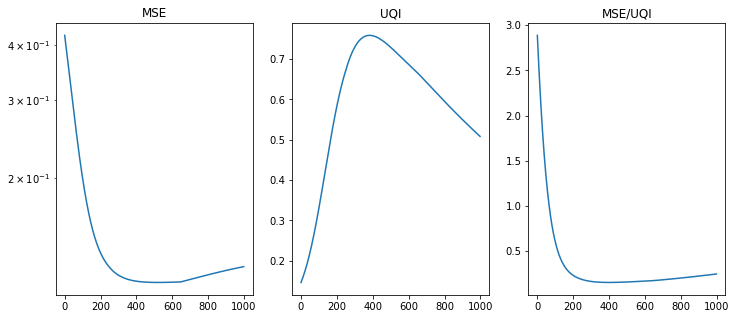

In [174]:
plt.figure(figsize=(12,5))
plt.subplot(131)
plt.plot(mse_arr)
plt.yscale("log")
plt.title("MSE")
plt.subplot(132)
plt.plot(uqi_arr)
plt.title("UQI")
plt.subplot(133)
plt.plot(b_arr)
plt.title("MSE/UQI")
plt.show()

In [175]:
print(np.argmin(mse_arr), np.argmax(uqi_arr), np.argmin(b_arr))

520 382 400
